In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))   

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


C:\Users\prabh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 122s 281ms/step - accuracy: 0.8581 - loss: 0.4780 - val_accuracy: 0.1247 - val_loss: 4.7963
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 127s 301ms/step - accuracy: 0.9808 - loss: 0.0600 - val_accuracy: 0.9913 - val_loss: 0.0288
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 131s 310ms/step - accuracy: 0.9885 - loss: 0.0365 - val_accuracy: 0.9937 - val_loss: 0.0233
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 130s 309ms/step - accuracy: 0.9886 - loss: 0.0348 - val_accuracy: 0.9915 - val_loss: 0.0276
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 128s 303ms/step - accuracy: 0.9919 - loss: 0.0275 - val_accuracy: 0.9935 - val_loss: 0.0234
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 130s 309ms/step - accuracy: 0.9926 - loss: 0.0226 - val_accuracy: 0.9905 - val_loss: 0.0401
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 130s 307ms/step - accuracy: 0.9914 - loss: 0.0266 - val_accuracy: 0.9923 - val_loss: 0.0261
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 129s 306ms/step - accuracy: 0.9938 -

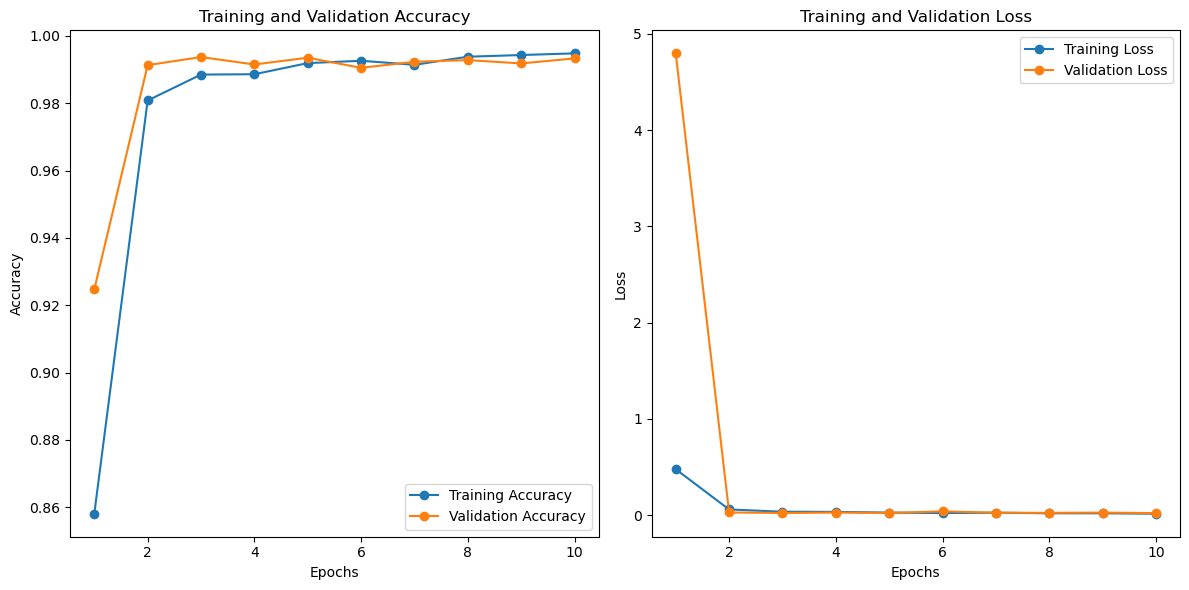

In [9]:
import matplotlib.pyplot as plt

# Training and validation metrics
accuracy = [0.8581, 0.9808, 0.9885, 0.9886, 0.9919, 0.9926, 0.9914, 0.9938, 0.9943, 0.9948]
val_accuracy = [0.9247, 0.9913, 0.9937, 0.9915, 0.9935, 0.9905, 0.9923, 0.9928, 0.9918, 0.9933]
loss = [0.4780, 0.0600, 0.0365, 0.0348, 0.0275, 0.0226, 0.0266, 0.0201, 0.0199, 0.0159]
val_loss = [4.7963, 0.0288, 0.0233, 0.0276, 0.0234, 0.0401, 0.0261, 0.0248, 0.0273, 0.0224]

# Number of epochs
epochs = range(1, 11)

# Plotting accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
